# Capstone: Vital Statistics of Professional Athletes

## Analysis Notebook for pro basketball players

### Questions:

- What is the life expectancy of an NBA player born in a particular year?
    - How do we compute life expectancy?
- How do deaths of NBA players in a particular year compare with the deaths of the general population?
    - How do we make a (naive) predictive model of deaths in a year?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

### Load and merge NBA player DataFrames

In [2]:
all_basketball = pd.read_csv('./basketball.csv')

In [3]:
all_basketball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4578 entries, 0 to 4577
Data columns (total 8 columns):
Unnamed: 0    4578 non-null int64
age           851 non-null float64
birth date    4551 non-null object
death date    871 non-null object
experience    4578 non-null int64
games         4578 non-null int64
link          4578 non-null object
name          4578 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 286.2+ KB


In [4]:
all_basketball.tail()

,Unnamed: 0,age,birth date,death date,experience,games,link,name
4573,4573,NaN,1998-05-17,NaN,1,61,/players/f/fergute01.html,Terrance Ferguson
4574,4574,NaN,1998-05-29,NaN,1,14,/players/f/fultzma01.html,Markelle Fultz
4575,4575,NaN,1998-02-04,NaN,1,63,/players/m/monkma01.html,Malik Monk
4576,4576,NaN,1998-07-28,NaN,1,78,/players/n/ntilila01.html,Frank Ntilikina
4577,4577,NaN,1998-03-03,NaN,1,80,/players/t/tatumja01.html,Jayson Tatum


#### Bring in Country of Birth

In [5]:
us_nba = pd.read_csv('./us_nba.csv')
world_nba = pd.read_csv('./world_nba.csv')

In [6]:
nba_birthplace = pd.concat([us_nba, world_nba], axis=0)

In [64]:
nba_df = pd.merge(all_basketball, nba_birthplace[['link','country']], how='outer', on='link')

In [65]:
nba_df.head()

,Unnamed: 0,age,birth date,death date,experience,games,link,name,country
0,0,77.0,1902-01-30,1979-09-16,1,2,/players/h/hickena01.html,Nat Hickey,United States
1,1,NaN,1913-09-04,1967-01-00,1,30,/players/f/fabeljo01.html,Joe Fabel,NaN
2,2,92.0,1913-11-03,2006-03-14,1,6,/players/f/frankna01.html,Nat Frankel,NaN
3,3,99.0,1913-09-06,2013-03-25,1,2,/players/g/goldfbe01.html,Ben Goldfaden,NaN
4,4,74.0,1913-12-03,1988-03-21,1,23,/players/s/shippch01.html,Charley Shipp,NaN


In [66]:
nba_df[nba_df['country'].isnull()].tail()

,Unnamed: 0,age,birth date,death date,experience,games,link,name,country
1641,1641,NaN,1953-01-29,NaN,1,12,/players/b/barnena01.html,Nathaniel Barnett,NaN
1652,1652,NaN,1953-01-01,NaN,1,11,/players/d/darneri01.html,Rick Darnell,NaN
1678,1678,NaN,1953-12-26,NaN,1,8,/players/o/owensed01.html,Eddie Owens,NaN
1687,1687,NaN,1953-07-12,NaN,1,19,/players/s/smithke02.html,Ken Smith,NaN
1821,1821,NaN,1955-07-25,NaN,1,2,/players/w/wisesk01.html,Skip Wise,NaN


In [67]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4578 entries, 0 to 4577
Data columns (total 9 columns):
Unnamed: 0    4578 non-null int64
age           851 non-null float64
birth date    4551 non-null object
death date    871 non-null object
experience    4578 non-null int64
games         4578 non-null int64
link          4578 non-null object
name          4578 non-null object
country       4075 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 357.7+ KB


#### Incorporate year of birth

In [68]:
nba_birth_years = pd.read_csv('./nba_birth_years.csv')
nba_df = nba_df.merge(nba_birth_years, on='link')
nba_df.head()

,Unnamed: 0,age,birth date,death date,experience,games,link,name,country,birth year
0,0,77.0,1902-01-30,1979-09-16,1,2,/players/h/hickena01.html,Nat Hickey,United States,1902
1,1,NaN,1913-09-04,1967-01-00,1,30,/players/f/fabeljo01.html,Joe Fabel,NaN,1913
2,2,92.0,1913-11-03,2006-03-14,1,6,/players/f/frankna01.html,Nat Frankel,NaN,1913
3,3,99.0,1913-09-06,2013-03-25,1,2,/players/g/goldfbe01.html,Ben Goldfaden,NaN,1913
4,4,74.0,1913-12-03,1988-03-21,1,23,/players/s/shippch01.html,Charley Shipp,NaN,1913


### Group players by year of birth and death

In [69]:
nba_counts = nba_df.groupby('birth year').count()

In [70]:
nba_counts['pct deceased'] = nba_counts['death date'] / nba_counts['link']

In [71]:
nba_counts.loc[1902:1951, ['link', 'death date', 'pct deceased']]

,link,death date,pct deceased
birth year,,,
1902,1,1,1.000000
1913,4,4,1.000000
1914,1,1,1.000000
1915,6,6,1.000000
1916,8,8,1.000000
1917,12,12,1.000000
1918,20,20,1.000000
1919,22,21,0.954545
1920,40,40,1.000000


In [72]:
nba_counts.loc[1951:1999, ['link', 'death date', 'pct deceased']]

,link,death date,pct deceased
birth year,,,
1951,74,14,0.189189
1952,53,9,0.169811
1953,62,9,0.145161
1954,49,6,0.122449
1955,72,9,0.125000
1956,65,6,0.092308
1957,65,3,0.046154
1958,65,4,0.061538
1959,63,1,0.015873


#### Plot of percentage of players born in a given year who are deceased

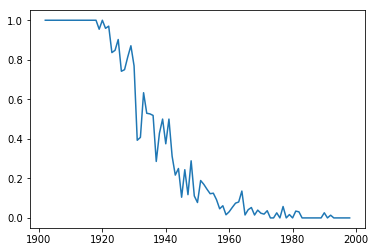

In [73]:
plt.plot(nba_counts.index, nba_counts['pct deceased'])

Somewhat surprisingly high ratio of players born in 1964 are deceased

In [74]:
nba_df[(nba_df['birth year'] == 1964) & (nba_df['death date'].notnull())]

,Unnamed: 0,age,birth date,death date,experience,games,link,name,country,birth year
2334,2334,24.0,1964-10-06,1989-08-14,1,64,/players/b/berryri01.html,Ricky Berry,United States,1964
2342,2342,44.0,1964-04-01,2008-08-25,11,684,/players/d/duckwke01.html,Kevin Duckworth,United States,1964
2345,2345,38.0,1964-12-07,2003-05-29,3,147,/players/f/fredean01.html,Anthony Frederick,United States,1964
2348,2348,47.0,1964-05-28,2011-07-05,13,929,/players/g/gilliar01.html,Armen Gilliam,United States,1964
2351,2351,51.0,1964-01-27,2015-03-16,9,341,/players/h/haleyja01.html,Jack Haley,United States,1964
2367,2367,47.0,1964-04-22,2011-07-01,5,178,/players/m/mccanbo01.html,Bob McCann,United States,1964
2376,2376,28.0,1964-10-22,1993-06-07,4,290,/players/p/petrodr01.html,Drazen Petrovic,Croatia,1964
2392,2392,50.0,1964-11-28,2015-01-09,6,280,/players/t/tarplro01.html,Roy Tarpley,United States,1964
2393,2393,44.0,1964-06-09,2009-05-15,12,840,/players/t/tisdawa01.html,Wayman Tisdale,United States,1964
2400,2400,52.0,1964-01-06,2016-04-20,3,194,/players/w/washipe01.html,Pearl Washington,United States,1964


In [75]:
# Incorporate death year from death date
nba_df['death year'] = [int(str(bd)[:4]) if len(str(bd)) > 3 else None for bd in nba_df['death date'] ]

In [76]:
nba_df.sort_values('death year', ascending=False)

,Unnamed: 0,age,birth date,death date,experience,games,link,name,country,birth year,death year
1807,1807,62.0,1955-10-19,2018-07-08,10,673,/players/s/sheltlo01.html,Lonnie Shelton,United States,1955,2018.0
434,434,90.0,1927-09-02,2018-03-10,1,65,/players/r/rhodege01.html,Gene Rhodes,NaN,1927,2018.0
784,784,78.0,1939-09-29,2018-09-27,8,548,/players/w/williar01.html,Art Williams,United States,1939,2018.0
831,831,77.0,1941-01-31,2018-07-12,10,670,/players/c/chapple01.html,Len Chappell,United States,1941,2018.0
576,576,86.0,1931-07-13,2018-07-08,9,623,/players/r/ramsefr01.html,Frank Ramsey,United States,1931,2018.0
859,859,75.0,1942-07-28,2018-05-14,1,69,/players/b/bayneho01.html,Howard Bayne,United States,1942,2018.0
685,685,81.0,1936-06-26,2018-04-14,15,1122,/players/g/greerha01.html,Hal Greer,United States,1936,2018.0
3339,3339,38.0,1979-05-23,2018-01-31,13,809,/players/b/butlera01.html,Rasual Butler,United States,1979,2018.0
3474,3474,36.0,1981-05-29,2018-04-02,3,73,/players/f/fordal02.html,Alton Ford,United States,1981,2018.0
1210,1210,71.0,1946-11-16,2018-01-16,12,837,/players/w/whitejo01.html,Jo Jo White,United States,1946,2018.0


In [77]:
nba_death_counts = nba_df.groupby('death year').count()

In [78]:
nba_death_counts

,Unnamed: 0,age,birth date,death date,experience,games,link,name,country,birth year
death year,,,,,,,,,,
1958.0,3,3,3,3,3,3,3,3,2,3
1959.0,1,1,1,1,1,1,1,1,1,1
1961.0,1,1,1,1,1,1,1,1,1,1
1965.0,2,2,2,2,2,2,2,2,2,2
1966.0,1,0,1,1,1,1,1,1,0,1
1967.0,1,0,1,1,1,1,1,1,0,1
1968.0,7,6,7,7,7,7,7,7,4,7
1969.0,1,1,1,1,1,1,1,1,0,1
1970.0,4,2,4,4,4,4,4,4,2,4


#### Plot of births and deaths of NBA players in a given year

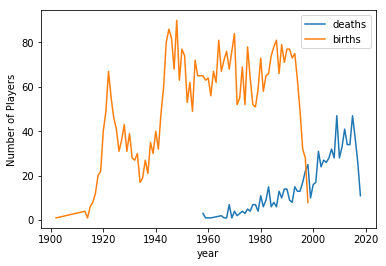

In [79]:
plt.plot(nba_death_counts.index, nba_death_counts['link'], label='deaths')
plt.plot(nba_counts.index, nba_counts['link'], label='births')
plt.xlabel('year')
plt.ylabel('Number of Players')
plt.legend()

### Exploring SSA Life tables

In [24]:
ssa_2015 = pd.read_csv('./ssa_tables/ssa_2015.csv')

In [27]:
ssa_2015['male num lives'] = [int(n.replace(',', '')) for n in ssa_2015['male num lives']]

In [28]:
ssa_2015['male deaths'] = -1 * ssa_2015['male num lives'].diff()

In [29]:
ssa_2015.head()

,Unnamed: 0,age,male prob death,male num lives,male life exp,female prob death,female num lives,female life exp,male deaths
0,0,0,0.006383,100000,76.15,0.005374,"100,000",80.97,NaN
1,1,1,0.000453,99362,75.63,0.000353,"99,463",80.41,638.0
2,2,2,0.000282,99317,74.67,0.000231,"99,427",79.44,45.0
3,3,3,0.000230,99289,73.69,0.000165,"99,405",78.45,28.0
4,4,4,0.000169,99266,72.71,0.000129,"99,388",77.47,23.0


#### Plot estimated number of males out of 100,000 who will die at a particular age

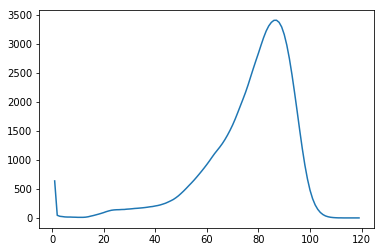

In [30]:
plt.plot(ssa_2015['male deaths'])

### Expected number of deaths of NBA players in given year

In [31]:
# Try out for 2015:
total = 0
for i in range(1, ssa_2015.shape[0]):
    birth_year = 2015 - i
    if birth_year in nba_counts.index:
        total += ssa_2015.loc[i, 'male deaths'] / 100000 * nba_counts.loc[birth_year, 'link']
print(total)

43.90244000000001


In [80]:
nba_exp_deaths = {}
for year in range(2004, 2016):
    try:
        ssa = pd.read_csv('./ssa_tables/ssa_' + str(year) + '.csv')
    except:
        continue
    ssa['male num lives'] = [int(n.replace(',', '')) for n in ssa['male num lives']]
    ssa['male deaths'] = -1 * ssa['male num lives'].diff()
    total = 0
    for i in range(1, ssa.shape[0]):
        birth_year = year - i
        if birth_year in nba_counts.index:
            total += ssa.loc[i, 'male deaths'] / 100000 * nba_counts.loc[birth_year, 'link']
    nba_exp_deaths[year] = total

In [81]:
nba_exp_deaths

{2004: 32.38887,
 2005: 33.833149999999996,
 2006: 34.88869,
 2007: 35.96994999999999,
 2009: 38.08619999999999,
 2010: 39.19486,
 2011: 40.260259999999995,
 2013: 42.26639000000001,
 2014: 43.05193999999999,
 2015: 43.90244000000001}

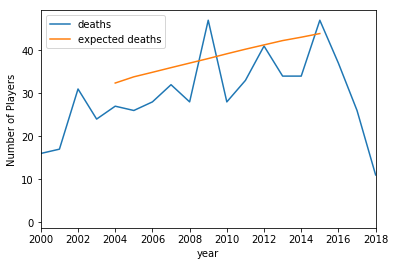

In [82]:
nba_exp_deaths_df = pd.DataFrame.from_dict(nba_exp_deaths, orient='index', columns=['exp deaths'])

plt.plot(nba_death_counts.index, nba_death_counts['link'], label='deaths')
plt.plot(nba_exp_deaths_df, label='expected deaths')
plt.xlabel('year')
plt.ylabel('Number of Players')
plt.xlim(2000, 2018)
plt.legend()

### Compare distribution of ages at death of NBA players versus general population

In [83]:
us_live_births = pd.read_csv('./NCHS_-_Births_and_General_Fertility_Rates__United_States.csv')

us_live_births.set_index(['Year'], inplace=True)

In [35]:
us_live_births.head()

,Birth Number,General Fertility Rate,Crude Birth Rate
Year,,,
2015,3978497,62.5,12.4
2014,3988076,62.9,12.5
2013,3932181,62.5,12.4
2012,3952841,63.0,12.6
2011,3953590,63.2,12.7


In [36]:
us_est_deaths = [ -1 * ssa_2015.loc[2015-i+1, 'male deaths'] / 100000 * us_live_births.loc[i, 'Birth Number'] 
                 for i in us_live_births.index]

In [39]:
probs = us_est_deaths[18:] / sum(us_est_deaths[18:])
ages = len(us_est_deaths[18:])

In [84]:
nba_df[nba_df['death year'] == 2005]

,Unnamed: 0,age,birth date,death date,experience,games,link,name,country,birth year,death year
12,12,88.0,1916-05-18,2005-04-14,1,30,/players/a/aubucch01.html,Chet Aubuchon,United States,1916,2005.0
76,76,85.0,1920-06-13,2005-12-28,1,7,/players/c/cloydpa01.html,Paul Cloyd,NaN,1920,2005.0
84,84,84.0,1920-12-22,2005-05-17,2,79,/players/g/goodwpo01.html,Pop Goodwin,United States,1920,2005.0
132,132,83.0,1921-12-06,2005-07-11,4,204,/players/j/johnsra01.html,Ralph Johnson,NaN,1921,2005.0
185,185,82.0,1922-07-29,2005-07-24,5,293,/players/h/hertzso01.html,Sonny Hertzberg,United States,1922,2005.0
245,245,82.0,1923-09-18,2005-10-15,1,50,/players/g/gardnea01.html,Earl Gardner,NaN,1923,2005.0
248,248,82.0,1923-02-05,2005-07-14,2,84,/players/g/gunthco01.html,Coulby Gunther,United States,1923,2005.0
253,253,82.0,1923-05-21,2005-06-04,2,113,/players/k/klierle01.html,Leo Klier,United States,1923,2005.0
284,284,82.0,1923-06-26,2005-12-17,1,53,/players/w/williwa01.html,Ward Williams,United States,1923,2005.0
310,310,80.0,1924-06-18,2005-06-01,7,439,/players/m/mikange01.html,George Mikan,United States,1924,2005.0


In [86]:
# Fill in missing ages
for i in nba_df.index:
    if np.isnan(nba_df.loc[i, 'age']):
        if np.isnan(nba_df.loc[i, 'death year']) == False:
            nba_df.loc[i, 'age'] = nba_df.loc[i, 'death year'] - nba_df.loc[i, 'birth year']

In [87]:
result =stats.ttest_ind(np.random.choice(range(18, 18+ages), 10000, replace=True, p=probs),
                nba_df[nba_df['death year'] == 2015]['age'])

In [88]:
result.pvalue

0.3007653425956648

In [89]:
for year in range(2004, 2016):
    try:
        death_pct = pd.read_csv('./ssa_tables/death_pct_' + str(year) + '.csv')
    except:
        continue
    us_est_deaths = [death_pct.loc[year-i+1, 'male death pct'] * us_live_births.loc[i, 'Birth Number'] 
                     for i in us_live_births.index if i <= year]
    probs = us_est_deaths[18:] / sum(us_est_deaths[18:])
    ages = len(us_est_deaths[18:])
    result = stats.ttest_ind(np.random.choice(range(18, 18+ages), 10000, replace=True, p=probs),
                             nba_df[nba_df['death year'] == year]['age'])
    print(year, result.pvalue)

2004 0.2339000471869651
2005 0.7626486817499273
2006 0.6822291751862628
2007 0.10324947261373855
2009 0.8178280544517155
2010 0.9597153944058998
2011 0.41753004502527746
2013 0.6448776996264554
2014 0.5346323673619842
2015 0.2573605971993304


### Average age of NBA players who died in a certain year

In [90]:
nba_df.groupby('death year').mean()

,Unnamed: 0,age,experience,games,birth year
death year,,,,,
1958.0,229.666667,34.333333,1.333333,27.666667,1922.666667
1959.0,56.000000,40.000000,4.000000,196.000000,1919.000000
1961.0,510.000000,31.000000,2.000000,113.000000,1929.000000
1965.0,641.500000,30.000000,7.000000,478.500000,1934.000000
1966.0,524.000000,36.000000,1.000000,11.000000,1930.000000
1967.0,1.000000,54.000000,1.000000,30.000000,1913.000000
1968.0,322.142857,41.428571,1.714286,61.285714,1926.142857
1969.0,587.000000,37.000000,3.000000,211.000000,1932.000000
1970.0,602.750000,36.000000,1.750000,74.750000,1933.500000


#### Save merged NBA DataFrame

In [91]:
nba_df.to_csv('./data/nba_merged.csv')